In [24]:
import json, os, re, operator, math, multidict
import os
from tqdm import tqdm_notebook as tqdm
from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import paths
from collections import Counter
from Stemmer import Stemmer
stemmer = Stemmer('russian')
from gensim.models import KeyedVectors 

C:\Users\VDanilova\AppData\Local\Continuum\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
#from nltk.corpus import stopwords

#stops = stopwords.words('russian')
#print(stops)

In [3]:
def write_in_json(path, data):
    f = open(path, 'w', encoding = 'utf-8')
    json.dump(data, f, indent = 2, ensure_ascii = False)
    f.close()
    

def read_from_json(path):
    with open(path, encoding = 'utf-8') as json_file:  
        data = json.load(json_file)
    return data

### Считываем весь корпус и считаем частотности слов

In [4]:
def load_texts():
    dirs = os.walk('C:\\Users\\VDanilova\\HSE\\ruscorpora')
    texts = []
    for dirr in dirs:    
        path = dirr[0] + '/'
        files = dirr[2]
        for file in tqdm(files):
            text = read_from_json(path + file)
            for t in text:
                for sent in t:
                    texts.append(sent)
    return texts

In [5]:
def count_words(texts):
    ct = Counter()
    for word in texts:
        ct[word] += 1  
    return ct         

In [6]:
#texts = load_texts()

In [7]:
#ct = count_words(texts)
#print (ct.most_common(100)) 

In [8]:
def word_freq_plot(ct):
    freq = {}
    for word in ct.keys():
        number = ct[word]
        if number//50 not in freq.keys():
            freq[number//50] = []
        freq[number//50].append(word)    
    
    x = list(freq.keys())
    x.sort()
    y = []
    x1 = []
    for fr in x:
        if (fr < 1000):
            x1.append(fr)
            y.append(len(freq[fr]))
    print(max(x1))
    print(max(y))
    dpi = 80
    fig = plt.figure(dpi = dpi, figsize = (512*2 / dpi, 384*2 / dpi) )

    plt.plot(x1,y, color = 'blue')

    plt.title('Word frequency')
    plt.ylabel('Number of words')
    plt.xlabel('Number of mentions // 50') 
    
    plt.show()
    fig.savefig('word_freq.png')
    return freq

974
695199


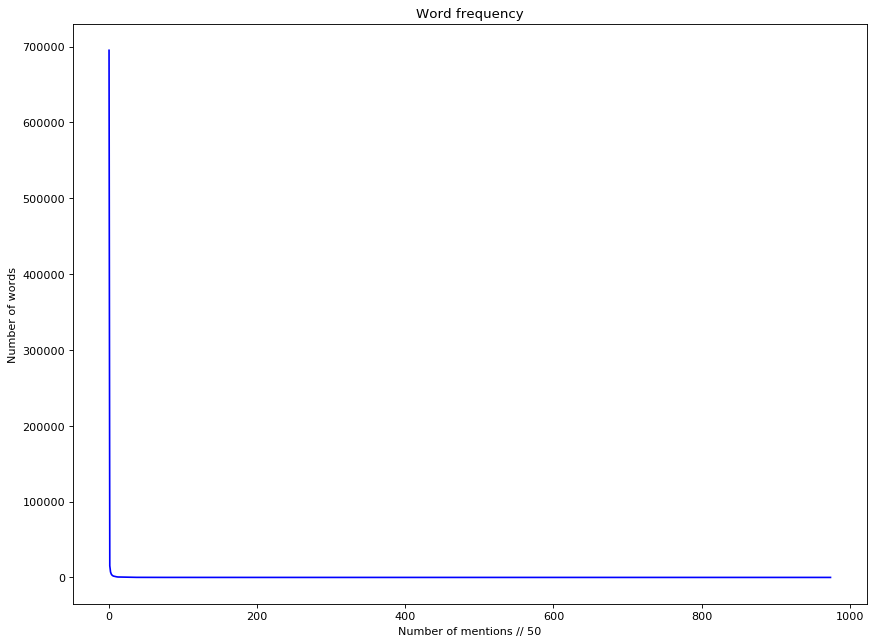

In [139]:
#freq = word_freq_plot(ct)

In [9]:
#x = list(freq.keys())
#x.sort()
#print(len(x))

#### Выписываем слова со средней частотностью

In [10]:
def write_in_txt(name, data):
    with open(name+'.txt', 'w', encoding='utf-8') as f:
        for line in data:
            l = ""
            if type(line) == list:
                for word in line:
                    l += word
                    l += ", "
            else: l = line
            f.write(l+"\n")

In [11]:
#words = []
#for fr in x[250:450]:
#    words.append(freq[fr])
#write_in_txt("words", words)

In [146]:
#str(x[250]*50)+"-"+str(x[450]*50)

'12500-24600'

### Считываем выбранные для тестирования слова и их контексты

In [12]:
def read_words(file):
    res = []
    with open(file, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    for line in lines:
        words = line.strip('\n').split(' ')
        for w in words:
            res.append(w)
    return res

In [13]:
test_words = read_words('data/sem_groups.txt')

In [14]:
def load_contexts(words):
    dirs = os.walk(paths._ruscorpora_)
    texts = {}
    for word in words:
        texts[word] = []
    for dirr in dirs:    
        path = dirr[0] + '/'
        files = dirr[2]
        for file in tqdm(files):
            text = read_from_json(path + file)
            for sent in text:
                for w in words:
                    if (w in sent) or (w.replace("е", "ё") in sent):
                        for word in sent:
                            texts[w].append(word)
    return texts

In [15]:
contexts = load_contexts(test_words)

Exception in thread Thread-8:
Traceback (most recent call last):
  File "C:\Users\VDanilova\AppData\Local\Continuum\Anaconda3\lib\threading.py", line 916, in _bootstrap_inner
    self.run()
  File "C:\Users\VDanilova\AppData\Local\Continuum\Anaconda3\lib\site-packages\tqdm\_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "C:\Users\VDanilova\AppData\Local\Continuum\Anaconda3\lib\_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



In [34]:
for word in contexts.keys():
    print(word + " - " + str(len(contexts[word])))

строительство - 714525
двор - 763115
завод - 700710
автомобиль - 710064
самолет - 643014
стена - 890301
улица - 1474634
дорога - 1439666
площадь - 785881
окно - 1100464
квартира - 1290695
ученый - 821234
специалист - 985512
исследование - 1078274
институт - 1126771
наука - 1129321
школа - 1328283
знание - 715813
технология - 725518
факт - 985552
фирма - 824819
руководитель - 937947
начальник - 874389
договор - 586295
директор - 972428
рабочий - 999005
экономика - 847836
министр - 787955
регион - 814441
гражданин - 927883
политика - 1119327
служба - 1073530
партия - 1076830
федерация - 779435
общественный - 942162
национальный - 945614
мировой - 1092447
экономический - 1104877
социальный - 1116183
федеральный - 883047
музыка - 742581
писатель - 773532
сцена - 821440
спектакль - 679510
картина - 949862
искусство - 963705
фильм - 855345
культура - 1176744
автор - 1453239
театр - 1079531


### Стопслова

In [15]:
STOPS = read_words("data/stopwords.txt")

### Создаем облака слов

In [16]:
def getFrequencyDictForText(sents, w):
    fullTermsDict = multidict.MultiDict()
    tmpDict = {}

    # making dict for counting frequencies
    for word in sents:
        if word not in STOPS and word != w and not w.startswith(word) and not word.isdigit():                
            val = tmpDict.get(word,0)
            tmpDict[word] = val+1
    for key in tmpDict:
        fullTermsDict.add(key,tmpDict[key])
    return fullTermsDict



def Cloud(w, dic):    
    wc = WordCloud(background_color="white", max_words=100)
    # generate word cloud
    wc.generate_from_frequencies(dic)
    fig = plt.figure()

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    #plt.show()
    fig.savefig('pic/'+w+'.png') 
    plt.close(fig)
    return wc.words_.keys()

In [87]:
for word in contexts.keys():
    sents = contexts[word]
    dic = getFrequencyDictForText(sents, word)
    definition = Cloud(word, dic)
    write_in_txt("cloud_words/"+word, definition)

### Считываем словарные определения слов

In [8]:
dict_definitions = {}
with open("data/definitions.tsv", 'r', encoding='utf-8') as f:
    lines = f.readlines()
for line in lines:
    content = line.strip('\n').split('\t')
    word = content[0]
    if word not in dict_definitions.keys():
        dict_definitions[word] = []
    definitions = content[1].split(';')
    for definition in definitions:
        defin = []
        definition = definition.lower()
        words = re.findall("\w\w+", definition)
        for w in words:
            normal = morph.parse(w)[0].normal_form
            if normal not in defin and normal not in STOPS:
                defin.append(normal)
        dict_definitions[word].append(defin)

In [9]:
dirs = os.walk('cloud_words/tf')
clouds = {}
for dirr in dirs:    
    path = dirr[0] + '/'
    files = dirr[2]
    for file in files:
        text = read_words(path + file)
        clouds[file[0:-4]] = text

In [12]:
dict_definitions_norm = {}
precision = {}
recall = {}
for word in dict_definitions.keys():
    good = 0
    dict_definitions_norm[word] = []
    for definition in dict_definitions[word]:
        for w in definition:
            if w not in dict_definitions_norm[word]:
                dict_definitions_norm[word].append(w)
                if w in clouds[word]:
                    good += 1
    precision[word] = good/len(clouds[word])
    recall[word] = good/len(def_words)
write_in_json("data/precision_pure", precision)
write_in_json("data/recall_pure", recall)

#### Учитываем однокоренные слова

In [18]:
def common_letters(word1, word2):
    n = 0
    i = 0
    for letter in word1:
        if i > len(word2) - 1:
            return n
        if word2[i] == letter:
            n +=1
        else:
            return n
        i += 1
    return n

In [19]:
common_letters("автомобил", "автомобильн")

9

In [20]:
def have_same_root(word1, word2):
    w1_stem = stemmer.stemWord(word1)
    w2_stem = stemmer.stemWord(word2)
    if w1_stem == w2_stem:
        return True
    comm = common_letters(w1_stem,w2_stem)
    if comm < 4:
        return False
    if comm > 6:
        return True
    diff = abs(len(max(w1_stem,w2_stem))-comm)        
    if diff > comm or diff > 2:
        return False
    return True

In [114]:
with open("data/test_same_root.tsv","w",encoding="utf-8") as f:
    f.write("word1\tword2\tmethod_result\tmanual_result\n")
    for word in dict_definitions.keys():
        for w_dict in dict_definitions_norm[word]:
            for w_cl in clouds[word]:
                res = have_same_root(w_dict, w_cl)
                comm = common_letters(w_dict,w_cl)
                if comm > 2:
                    manual = True
                else:
                    manual = False
                f.write("{0}\t{1}\t{2}\t{3}\n".format(w_dict,w_cl,res,manual))

Нахождение однокоренных слов (не считая приставочного образования):

Точность - 141/151 = 93%

Полнота - 141/181 = 78%

Всего пар - 41304

In [115]:
precision = {}
recall = {}
for word in dict_definitions.keys():
    good = 0
    for w_dict in dict_definitions_norm[word]:
        if w_dict in clouds[word]:
            good += 1
        else:
            for w_cl in clouds[word]:             
                if have_same_root(w_dict, w_cl):                
                    good += 1
                    break
    precision[word] = good/len(clouds[word])
    recall[word] = good/len(def_words)
write_in_json("data/precision_root", precision)
write_in_json("data/recall_root", recall)

### Находим синонимы с помощью word2vec

In [22]:
model = KeyedVectors.load_word2vec_format(paths._word2vec-model_, binary=False)

In [29]:
test_words_pos = read_words('data/sem_groups_pos.txt')

In [72]:
word2vec_syns = {}
for word in test_words_pos:
    if word in model:
        word2vec_syns[word] = []        
        print(word)
        for i in model.most_similar(positive=[word], topn=30):
            neighbour = i[0]
            neighbour = neighbour[0:neighbour.find('_')].lstrip('-*')
            #normal_syn = morph.parse(neighbour)[0].normal_form
            normal_word = word[0:word.find('_')]
            if re.match(r'[а-я]+$',neighbour) and not have_same_root(neighbour,normal_word) and neighbour != normal_word and neighbour  not in word2vec_syns[word]:
                word2vec_syns[word].append(neighbour)
                print(neighbour, i[1])
        print('\n')
    else:
        # Увы!
        print(word + ' is not present in the model')

строительство_NOUN
постройка 0.7203490734100342
возведение 0.7086209058761597
достройка 0.6921594738960266
проектирование 0.6495847702026367
достройкий 0.6223522424697876
обустройство 0.6194686889648438
проектировка 0.6163986325263977
строить 0.6018748879432678
сооружение 0.601773738861084
сооружаемый 0.5950428247451782
строиться 0.5921915769577026
переоборудований 0.5788644552230835
достраивать 0.5760956406593323
реконструкция 0.5760175585746765
асфальтирование 0.5702623724937439
тэо 0.5560262203216553
сооружать 0.5503777861595154
возводиться 0.5471711754798889
сооружаться 0.5437153577804565
достроить 0.5435565114021301
обустройстве 0.5395413637161255


двор_NOUN
бобыльский 0.5845100283622742
бобыльская 0.578295886516571
помещиковый 0.546909749507904
конюшня 0.5417752265930176
вотчинников 0.5146950483322144
хлевушка 0.511130690574646
сарай 0.509268581867218
некрестьянский 0.5079385042190552
конюшать 0.5075098276138306
хлева 0.5054159760475159
покои 0.5047828555107117
мазанковый 0.5037

нейровизуализация 0.6031122207641602
нанохимия 0.5994465947151184
астробиологический 0.5986507534980774
изучения 0.5946413278579712
когортный 0.5942293405532837
типирование 0.5940755605697632
фармакогенетика 0.5938138365745544
молекулярный 0.5927599668502808
космохимия 0.5912656188011169
нефтегазопоисковый 0.5900338888168335
нейрохимия 0.5898922681808472
радиометрия 0.5882472395896912
эксперимент 0.5866504907608032
палеоботанический 0.5863620042800903
магниторазведка 0.585820198059082


институт_NOUN
техникум 0.619234025478363
нии 0.5796747207641602
факультет 0.5750071406364441
университет 0.5683900117874146
сельхозинститать 0.5646088123321533
мэси 0.5576006770133972
фтиан 0.5558115839958191
техникумый 0.5513932704925537
лесгафт 0.5503175258636475
зооинженерный 0.5475377440452576
госуниверситать 0.5460074543952942
физвоспитание 0.5443258881568909
аспирантура 0.542931854724884
мопи 0.5415215492248535
лпи 0.5411009788513184
тти 0.540136992931366
лгпи 0.5392363667488098
фгбн 0.53699588775

макроэкономической 0.5482989549636841
политология 0.5464417934417725


министр_NOUN
замминистра 0.7025718688964844
нарком 0.697770357131958
рейхсминистра 0.6573278307914734
рейхсминистр 0.6401572823524475
еврокомиссар 0.6263778805732727
финансы 0.6105955839157104
комиссариатый 0.6069900989532471


регион_NOUN
макрорегион 0.5761770009994507
тахуа 0.5682535171508789
марадя 0.5525565147399902
тибести 0.5399667620658875
дальний 0.5370780825614929
мокегуа 0.5361936688423157
пуно 0.5259349942207336
перигора 0.5212095975875854
молизя 0.5207520127296448
романья 0.5191491842269897
сарбур 0.5179382562637329
страна 0.5159783959388733
агадо 0.5129067301750183
висайджа 0.5125735402107239


гражданин_NOUN
граждан 0.6460057497024536
негражданин 0.5754658579826355
апатрид 0.5532790422439575
неграждавать 0.5448923110961914
налогоплательщик 0.5389751195907593
подданный 0.533065676689148
согражданин 0.530714750289917
иностранец 0.5258713960647583
неграждан 0.524968147277832
горожанин 0.5218350887298584
о

авансцена 0.540576159954071
ленкоме 0.5369424819946289
пантомимный 0.5368208289146423
олимпийского 0.5339697003364563
федру 0.5301132798194885


спектакль_NOUN
пьеса 0.7186375260353088
постановка 0.6939129829406738
глаголин 0.6872420310974121
ленкоме 0.6749526858329773
мтюз 0.6714749932289124
антрепризный 0.6704748272895813
отелло 0.6704117059707642
моноспектакль 0.6654964685440063
театр 0.6649371981620789
парсифаля 0.6617976427078247
ганнеле 0.6591504216194153
оперетту 0.6564608812332153
антимиры 0.6556047201156616
гостим 0.6532644629478455
гедд 0.6500253677368164
табакерке 0.6479624509811401
многоактный 0.6474534869194031
федру 0.6469331979751587
ваню 0.6458554863929749
тартюфа 0.6442620158195496
гамлета 0.6434634923934937
телеспектакл 0.6431136727333069


картина_NOUN
полотно 0.6363769769668579
купальщицы 0.6019638776779175
пейзаж 0.5847780108451843
капричос 0.5828256011009216
ботичелли 0.5793597102165222
фреска 0.5746743083000183
холст 0.5735470652580261
автопортрет 0.5707827210426

In [69]:
write_in_json('data/word2vec_syns', word2vec_syns)

### Облака из синонимов

In [82]:
for word in test_words_pos:
    if word in model:
        syn_dic = {} 
        for i in model.most_similar(positive=[word], topn=100):
            neighbour = i[0]
            neighbour = neighbour[0:neighbour.find('_')].lstrip('-*')
            normal_syn = morph.parse(neighbour)[0].normal_form
            normal_word = word[0:word.find('_')]
            if re.match(r'[а-я]+$',normal_syn) and not normal_syn.endswith("траница") and not have_same_root(normal_syn,normal_word) and normal_syn != normal_word and normal_syn not in syn_dic.keys():
                syn_dic[normal_syn] = i[1]
        definition = Cloud("syns_"+normal_word, syn_dic)
        write_in_txt("cloud_words/syns_"+normal_word, definition) 

### Tf - Idf

In [40]:
def compute_tf(text):
    tf_text = Counter(text)
    for i in tf_text.keys():
        tf_text[i] = tf_text[i]/float(len(text))
    return tf_text


def compute_idf(word, corpus):
    n = 0.0
    for i in corpus.keys():
        if word in corpus[i]:
            n += 1.0
    return math.log10(len(corpus.keys())/n)

 

def compute_tfidf(corpus):
    tf_idf_dic = {}
    for word in corpus.keys():
        tf_idf_one_text = {}
        print(word)
        computed_tf = compute_tf(corpus[word]).most_common(5000)
        print("tf computed!")
        for pair in tqdm(computed_tf):
            tf_idf = pair[1] * compute_idf(pair[0], corpus)
            if tf_idf > 0:
                tf_idf_one_text[pair[0]] = tf_idf
        print("tf-idf computed!")
        tf_idf_dic[word] = tf_idf_one_text
    return tf_idf_dic

In [41]:
tf_idf = compute_tfidf(contexts)
write_in_json('data/tf_idf', tf_idf)

строительство
tf computed!



tf-idf computed!
двор
tf computed!



tf-idf computed!
завод
tf computed!



tf-idf computed!
автомобиль
tf computed!



tf-idf computed!
самолет
tf computed!



tf-idf computed!
стена
tf computed!



tf-idf computed!
улица
tf computed!



tf-idf computed!
дорога
tf computed!



tf-idf computed!
площадь
tf computed!



tf-idf computed!
окно
tf computed!



tf-idf computed!
квартира
tf computed!



tf-idf computed!
ученый
tf computed!



tf-idf computed!
специалист
tf computed!



tf-idf computed!
исследование
tf computed!



tf-idf computed!
институт
tf computed!



tf-idf computed!
наука
tf computed!



tf-idf computed!
школа
tf computed!



tf-idf computed!
знание
tf computed!



tf-idf computed!
технология
tf computed!



tf-idf computed!
факт
tf computed!



tf-idf computed!
фирма
tf computed!



tf-idf computed!
руководитель
tf computed!



tf-idf computed!
начальник
tf computed!



tf-idf computed!
договор
tf computed!



tf-idf computed!
директор
tf computed!



tf-idf computed!
рабочий
tf computed!



tf-idf computed!
экономика
tf computed!



tf-idf computed!
министр
tf computed!



tf-idf computed!
регион
tf computed!



tf-idf computed!
гражданин
tf computed!



tf-idf computed!
политика
tf computed!



tf-idf computed!
служба
tf computed!



tf-idf computed!
партия
tf computed!



tf-idf computed!
федерация
tf computed!



tf-idf computed!
общественный
tf computed!



tf-idf computed!
национальный
tf computed!



tf-idf computed!
мировой
tf computed!



tf-idf computed!
экономический
tf computed!



tf-idf computed!
социальный
tf computed!



tf-idf computed!
федеральный
tf computed!



tf-idf computed!
музыка
tf computed!



tf-idf computed!
писатель
tf computed!



tf-idf computed!
сцена
tf computed!



tf-idf computed!
спектакль
tf computed!



tf-idf computed!
картина
tf computed!



tf-idf computed!
искусство
tf computed!



tf-idf computed!
фильм
tf computed!



tf-idf computed!
культура
tf computed!



tf-idf computed!
автор
tf computed!



tf-idf computed!
театр
tf computed!



tf-idf computed!


In [43]:
sorted_tf_idf = {}
for word in tf_idf.keys():    
    one_sorted_tf_idf = sorted(tf_idf[word].items(), key=operator.itemgetter(1), reverse = True)
    sorted_tf_idf[word] = dict(one_sorted_tf_idf[0:100])
write_in_json('data/sorted_tf_idf', sorted_tf_idf)

#### Облака по tf-idf частотам

In [23]:
sorted_tf_idf = read_from_json('data/sorted_tf_idf')
for word in sorted_tf_idf.keys():    
    definition_tf_idf = Cloud("tf-idf/tf_idf_"+word, sorted_tf_idf[word])
    write_in_txt("cloud_words/tf-idf/tf_idf_"+word, definition_tf_idf)